In [27]:
# Data Merge and Set Up Section

In [28]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
#print(city_data.head())
ride_data = pd.read_csv(ride_data_to_load)
#print(ride_data.head())

city_data.sort_values(by=['city'])
ride_data.sort_values(by=['city'])
# Combine the data into a single dataset
cityride = pd.merge( ride_data, city_data, on='city')

# Display the data table for preview

print(f'Data Merge Check')
cityride.head()


Data Merge Check


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [29]:
# Parsing Date Time for Ad-Hoc Analyses 

In [30]:
cityride.head()
# Imports to Extract Month and Time to do Analyses
import time
import datetime
import calendar

# Converting to Date from Object
cityride['DateTime'] = pd.to_datetime(cityride['date'])
# Define Month from the Date
cityride['Month'] = pd.DatetimeIndex(cityride['DateTime']).month
# Define Hour the Rides took place
cityride['Time'] = pd.DatetimeIndex(cityride['DateTime']).hour
# Define Day the Rides took Place
cityride['Date'] = pd.DatetimeIndex(cityride['DateTime']).date

# Converting the Month to a Month Name
cityride['Month'] = cityride['Month'].apply(lambda x: calendar.month_name[x])

print(f'Date data check that all converted')
cityride.head()

Date data check that all converted


,city,date,fare,ride_id,driver_count,type,DateTime,Month,Time,Date
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,2018-01-14 10:14:22,January,10,2018-01-14
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban,2018-04-07 20:51:11,April,20,2018-04-07
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban,2018-03-09 23:45:55,March,23,2018-03-09
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban,2018-04-07 18:09:21,April,18,2018-04-07
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban,2018-01-02 14:14:50,January,14,2018-01-02


## Summary Overview by City Type

In [31]:
# Grouping Data by City Type
# Overview States
cityride_summary = cityride.groupby('type').agg({'ride_id':'count',
                                                 'fare': 'mean', 
                                                 'driver_count': 'mean'}
                                                 )
cityride_summary['avg_rides_per_drivers'] = cityride_summary['ride_id']/cityride_summary['driver_count']


# Formatting fields for Summary Table
# Defining the Format function
def my_formats(field,myformat):
    cityride_summary[field]= cityride_summary[field].map(myformat.format)
    return;


# Calling the Format function
my_formats('fare','${:,.2f}')
my_formats('ride_id','{:,.0f}')
my_formats('driver_count','{:,.0f}')
my_formats('avg_rides_per_drivers','{:,.0f}')

cityride_summary

#Transpose the Data table for Summary Analyses
df2=cityride_summary.T
df2.rename(index={
                  'fare':'Avg_Fare', 
                  'ride_id':'Total_Rides', 
                  'driver_count': 'Avg_Driver_Count', 
                  'avg_rides_per_drivers': 'Avg_Rides_per_Drivers'}, 
                   inplace=True)


print(f'Summary Overview')

df2

Summary Overview


type,Rural,Suburban,Urban
Total_Rides,125,625,"1,625"
Avg_Fare,$34.62,$30.97,$24.53
Avg_Driver_Count,4,14,37
Avg_Rides_per_Drivers,29,46,44


In [32]:
# Looking at # of Rides by Hour to Identify any Trend worth Noting - Didn't find too much, so focusing on stats

# Identify the Hour where the Most Total Rides Occurred
cityride_rides = cityride.groupby('Time').agg({'ride_id':'count'})
rider_max =cityride_rides['ride_id'].max()

rider_total = cityride_rides['ride_id'].sum()

cityride_rides

print(' statistics found during analyses')

for index, row in cityride_rides.iterrows():
    if row['ride_id'] == rider_max:
        if index < 12:
            print('')
            print(f" {index}AM saw the most rides from Jan 1st thru May 8th: {rider_max}, this time frame represents {'{:,.2%}'.format(rider_max/rider_total)} total rides")
        else:
            print('')
            print(f" {index}PM saw the most rides from Jan 1st thru May 8th: {rider_max}, with {rider_total} total rides")
            
# Itentify the Highest Average Fare City
cityride_high = cityride.groupby(['city','type']).agg({'fare': 'mean'})
rider_fare = cityride_high['fare'].max()


for index, row in cityride_high.iterrows():
    if row['fare'] == rider_fare:
        print('')
        print(f" {row.name} had the highest average fares: {'${:,.2f}'.format(rider_fare)} ")

 

 statistics found during analyses

 2AM saw the most rides from Jan 1st thru May 8th: 123, this time frame represents 5.18% total rides

 ('New Ryantown', 'Rural') had the highest average fares: $43.28 


## Evaluation: Holidays that have above avg Driver Volumes

In [33]:
cityride_hol = cityride.groupby('Date').agg({'ride_id': 'count'})

cityride_mean = cityride_hol.mean()

print(cityride_hol.describe())

holidays = ['2018-01-01', '2018-01-15','2018-02-14','2018-02-19', '2018-03-17', '2018-04-01']
holiday_names = ['New Years Day', 'Martin Luther King Day', 'Valentines Day', 'Presidents Day', 'St. Patricks Day', 'Easter']


# Was not sure how to iterate and pull out the specific dates
# for index, row in cityride_hol.iterrows():
#     if row['ride_id'] > 19:
#         if index == '2018-01-01':
#             print(f"{holiday_names[holiday]} has more ride volume than the avg daily ride volume {row['ride_id']}")
#         else:
#             print(f" None of the Holidays have more ride volume than the avg daily ride volome")

#print(cityride_mean)
#cityride_hol.reset_index(inplace=True)
#print(cityride['Date'])
#print(holidays)

print('')
print('New Years Day')
print('')
print(cityride_hol[0:1])
print('')
print('Martin Luther King Weekend')
print('')
print(cityride_hol[11:15])
print('')
print('Valentines Day')
print('')
print(cityride_hol[44:45])
print('')
print('Presidents Day Weekend')
print('')
print(cityride_hol[46:50])
print('')
print('St. Patricks Day Weekend')
print('')
print(cityride_hol[74:76])
print('')
print('Easter Weekend')
print('')
print(cityride_hol[88:91])
# Jan 1 - 12 rides
# Jan 15 - 13 rides (friday was top 25% of highest volume days)
# Feb 14 - 18 rides
# Feb 19 - 29 rides (weekend was top 25% of highest volume days)
# Mar 17 - 27 rides  (sat was average)
# Apr 1 -  22 rides
       

          ride_id
count  128.000000
mean    18.554688
std      4.743514
min      7.000000
25%     15.750000
50%     19.000000
75%     22.000000
max     31.000000

New Years Day

            ride_id
Date               
2018-01-01       12

Martin Luther King Weekend

            ride_id
Date               
2018-01-12       18
2018-01-13       13
2018-01-14       20
2018-01-15       26

Valentines Day

            ride_id
Date               
2018-02-14       18

Presidents Day Weekend

            ride_id
Date               
2018-02-16       21
2018-02-17       22
2018-02-18       29
2018-02-19       29

St. Patricks Day Weekend

            ride_id
Date               
2018-03-16       18
2018-03-17       22

Easter Weekend

            ride_id
Date               
2018-03-30       16
2018-03-31        8
2018-04-01       22


## Overview Chart: Number of Rides per City by Avg Fare

In [34]:
# DATA PREP
# Obtain the x and y coordinates for each of the three city types
names = ['Rural','Suburban', 'Urban']
cityride_names={}

cityride_rural = cityride.loc[cityride['type'] == 'Rural',:]
cityride_m_rural = cityride_rural.groupby(['city','type']).agg({'fare': 'mean', 'ride_id':'count'})
cityride_s_rural = cityride_rural.groupby(['city','type']).agg({ 'driver_count':'sum'})

cityride_suburban = cityride.loc[cityride['type'] == 'Suburban',:]
cityride_m_suburban = cityride_suburban.groupby(['city','type']).agg({'fare': 'mean', 'ride_id':'count'})
cityride_s_suburban = cityride_suburban.groupby(['city','type']).agg({ 'driver_count':'sum'})

cityride_urban = cityride.loc[cityride['type'] == 'Urban',:]
cityride_m_urban = cityride_urban.groupby(['city','type']).agg({'fare': 'mean', 'ride_id':'count'})
cityride_s_urban = cityride_urban.groupby(['city','type']).agg({'driver_count':'sum'})


#MISC
#print(cityride_suburban_m)
#cityride_s_s
#u_cityride = cityride_urban.reset_index(inplace=True)
#u_cityride

<Figure size 432x288 with 0 Axes>

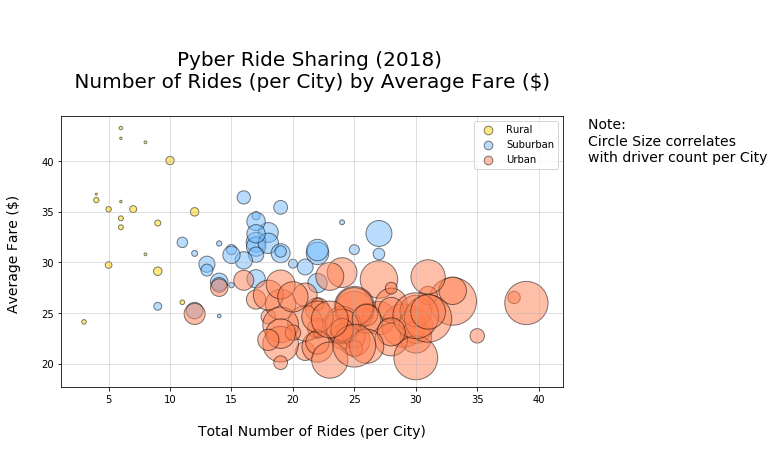

In [35]:
#DSIPLAYING CHART
# Define Lists for the Charts

city_type = ('Rural', 'Suburban','Urban')
colors = ('gold','xkcd:sky blue', 'coral')
circles = (cityride_s_rural,cityride_s_suburban,cityride_s_urban,)



#Create Subplot of Scatters
fig = plt.figure()
fig, ax = plt.subplots(figsize=(9, 5))

# Created the Bubble Charts

ax.scatter(cityride_m_rural['ride_id'],cityride_m_rural['fare'], marker = 'o', 
                                       edgecolor='black', facecolor = colors[0] ,alpha=0.5, 
                                       label=city_type[0], s=circles[0])

ax.scatter(cityride_m_suburban['ride_id'],cityride_m_suburban['fare'], marker = 'o', 
                                          edgecolor ='black', facecolor = colors[1],alpha=0.5, 
                                          label=city_type[1], s=circles[1])

ax.scatter(cityride_m_urban['ride_id'],cityride_m_urban['fare'], marker = 'o', 
                                       edgecolor='black', facecolor = colors[2] , alpha=0.5, 
                                       label=city_type[2], s=circles[2])


# Label formating
textstr = "Note: \nCircle Size correlates \nwith driver count per City"
plt.xlabel('\nTotal Number of Rides (per City)\n',fontsize=14)
plt.ylabel('Average Fare ($) \n',fontsize=14)
plt.title('\n \nPyber Ride Sharing (2018) \n Number of Rides (per City) by Average Fare ($) \n', fontsize=20)
#plt.xlim(0,40)

# Outside Notation of Text
ax.text(44, 40, textstr, fontsize=14)
ax.grid(alpha=0.5)

# Plot legend. Kimberly assisted in helping me identify the proper structure
lgnd = plt.legend(loc="upper right", numpoints=3, fontsize=10)

#change the marker size manually for both lines - (I created this)
for x in range(0,3):
    lgnd.legendHandles[x]._sizes=[75]


plt.show()



In [36]:
# GLOBAL VALUES FOR PIE CHARTS

explode = (.05, 0.05, .10 )

# Values assigned above for Bubble Chart
# city_type = ('Rural', 'Suburban', 'Urban')
# colors = ('gold','xkcd:sky blue', 'coral')

#Set Font Size
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

# Define the Pie Charts by City Type - (I created this)
def my_piecharts(my_values):
    plt.pie(my_values,labels=city_type, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
    return;


## Total Fares by City Type

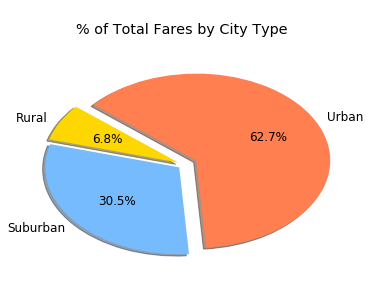

In [37]:
#print(total_fares)

# Calculate Type Percents
total_fares = cityride.groupby(['type'])['fare'].sum() / cityride['fare'].sum() *100

# QAing the code above that it does what it is supposed to
#for types in total_fares:
#    labels.append(total_fares[types])
#    print(types)
 

# Build Pie Chart
#plt.pie(total_fares,labels=city_type, colors=colors, explode=explode,
#        autopct='%1.1f%%', shadow=True, startangle=140)


# Run Pie Chart
my_piecharts(total_fares)
plt.title("\n% of Total Fares by City Type \n")
plt.show()


## Total Rides by City Type

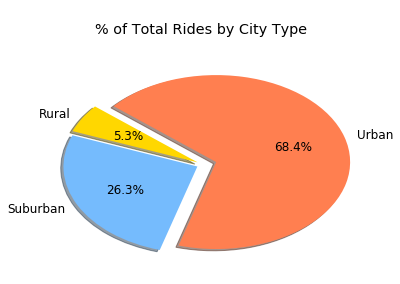

In [38]:
# Calculate Ride Percents
# Calculate Type Percents

total_ride_id = cityride.groupby(['type'])['ride_id'].count() / cityride['ride_id'].count()


# Run Pie Chart
my_piecharts(total_ride_id)
plt.title("\n% of Total Rides by City Type \n")

#Display Chart
plt.show()


## Total Drivers by City Type

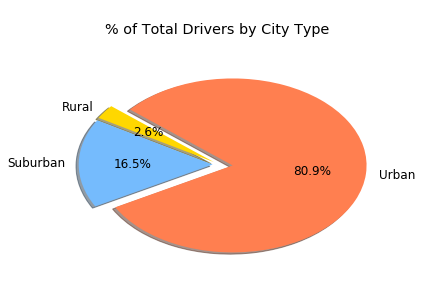

In [39]:
# Calculate Driver Percents
total_driver_count = city_data.groupby(['type'])['driver_count'].sum() / city_data['driver_count'].sum()


# Run Pie Chart 
my_piecharts(total_driver_count)
plt.title("\n% of Total Drivers by City Type \n")

#Display Chart
plt.show()
